In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.rcParams.update({"text.usetex": False,
                     "font.size": 14,
                     "pdf.fonttype": 42,
                     "ps.fonttype": 42})
plt.rcParams['xtick.labelsize']=12

In [3]:
map_key = "map_50"

In [5]:
df_tensor_jpeg_map = pd.read_csv("../measurements/yolo_tiny_splitpoint/layer_8/football_tensor_jpeg/map.csv")
df_tensor_jpeg_time = pd.read_csv("../measurements/yolo_tiny_splitpoint/layer_8/football_tensor_jpeg/time.csv")


## Map

In [13]:
tensor_jpeg_map_mean =[]
jpeg_groups=df_tensor_jpeg_map.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    tensor_jpeg_map_mean.append(dfg[map_key].to_numpy()*100)
tensor_jpeg_map_mean = np.array(tensor_jpeg_map_mean)

## Data size

In [15]:
tensor_jpeg_datasize_mean =[]
jpeg_groups=df_tensor_jpeg_map.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    tensor_jpeg_datasize_mean.append(dfg["data_size_mean"].to_numpy()/1e3)
tensor_jpeg_datasize_mean =np.array(tensor_jpeg_datasize_mean)

In [16]:
tensor_jpeg_datasize_mean

array([[11.92826596, 12.01525532, 11.94814894, 11.86104255, 11.62346809,
        11.52881915, 11.33567021, 11.14139362, 10.94679787, 10.60968085],
       [14.41969149, 14.46907447, 14.32173404, 14.29294681, 14.05587234,
        13.97484043, 13.73448936, 13.51890426, 13.19969149, 12.90519149],
       [18.6367766 , 18.71671277, 18.68168085, 18.61430851, 18.54242553,
        18.47484043, 18.18361702, 17.93412766, 17.71754255, 17.34598936],
       [28.8412234 , 28.77358511, 28.79885106, 28.70931915, 28.70710638,
        28.63251064, 28.53619149, 28.47993617, 28.14444681, 27.92206383],
       [65.14562766, 65.15103191, 65.11564894, 65.0771383 , 64.95947872,
        64.80348936, 64.61065957, 64.31769149, 63.96559574, 63.49404255]])

## Time

In [23]:
tensor_jpeg_elapsed_mean =[]
jpeg_groups=df_tensor_jpeg_time.groupby("jepg_quality")
for key in jpeg_groups.groups.keys():
    dfg = jpeg_groups.get_group(key)
    tensor_jpeg_elapsed_mean.append(dfg["head_time_mean"].to_numpy()+dfg["encode_time_mean"].to_numpy()+dfg["request_time_mean"].to_numpy())

tensor_jpeg_elapsed_mean =np.array(tensor_jpeg_elapsed_mean)


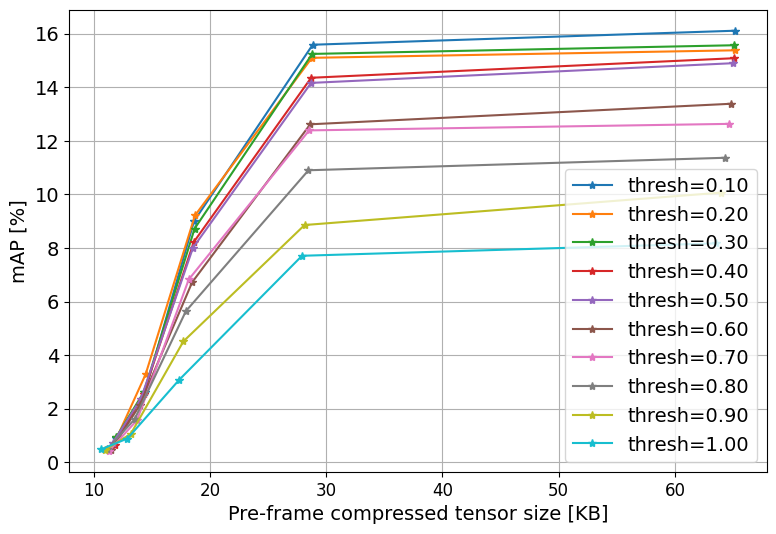

In [22]:
fig, ax1 = plt.subplots(figsize=(9, 6))

x_real = np.arange(1,6)

for i in range(10):
    thresh = format((i+1)*0.10,'.2f')
    ax1.plot(tensor_jpeg_datasize_mean[:,i],tensor_jpeg_map_mean[:,i], "*-", label="thresh="+thresh)
# ax1.plot(frame_jpeg_datasize_mean,frame_jpeg_map_mean, "^-", label="JPEG-Frame"  ,color="tab:purple" )
# ax1.plot(tensor_ml_datasize_mean,tensor_ml_map_mean, "s-", label="ML-Tensor"  ,color="tab:blue" )
# ax1.plot(0,df_frame_local_map[map_key].mean()*100, "D-", label="Local"  ,color="tab:cyan" )

ax1.set_ylabel("mAP [%]")
ax1.set_xlabel('Pre-frame compressed tensor size [KB]')
# ax1.set_xticks(x_real, x_real)
ax1.legend(loc="lower right")
ax1.autoscale(axis="x",tight=False)
# ax1.set_yscale("log")
# ax1.set_ylim([1,500])
# plt.legend((p1[0], p2[0]), ('boys', 'girls'), loc= "lower center")
# lgd = ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=3,columnspacing=0.7, fancybox=True, shadow=True)
ax1.grid()
fig.show()

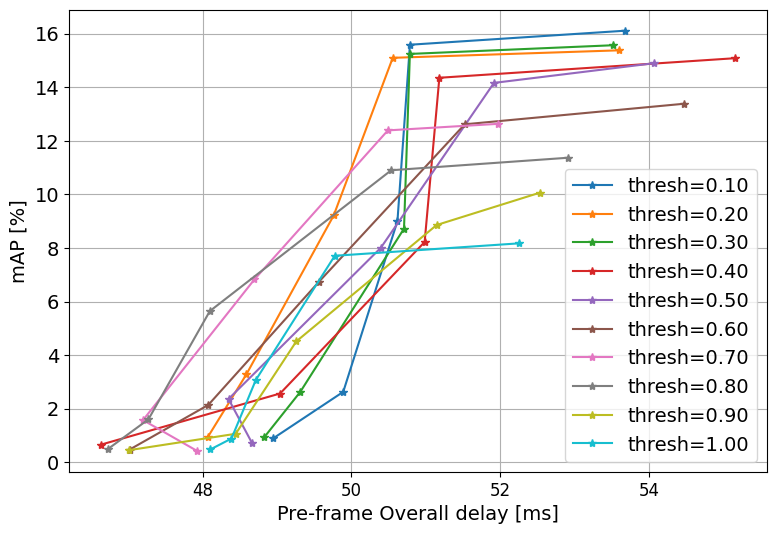

In [24]:
fig, ax1 = plt.subplots(figsize=(9, 6))

x_real = np.arange(1,6)

for i in range(10):
    thresh = format((i+1)*0.10,'.2f')
    ax1.plot(tensor_jpeg_elapsed_mean[:,i],tensor_jpeg_map_mean[:,i], "*-", label="thresh="+thresh  )
# ax1.plot(frame_jpeg_elapsed_mean,frame_jpeg_map_mean, "^-", label="JPEG-Frame"  ,color="tab:purple" )
# ax1.plot(tensor_ml_elapsed_mean,tensor_ml_map_mean, "s-", label="ML-Tensor"  ,color="tab:blue" )
# ax1.plot(df_frame_local_time["model_time_mean"].mean(),df_frame_local_map[map_key].mean()*100, "D-", label="Local"  ,color="tab:cyan" )

ax1.set_ylabel("mAP [%]")
ax1.set_xlabel('Pre-frame Overall delay [ms]')
# ax1.set_xticks(x_real, x_real)
ax1.legend()
ax1.autoscale(axis="x",tight=False)
# ax1.set_yscale("log")
# ax1.set_ylim([1,500])
# plt.legend((p1[0], p2[0]), ('boys', 'girls'), loc= "lower center")
# lgd = ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),ncol=3,columnspacing=0.7, fancybox=True, shadow=True)
ax1.grid()
fig.show()